 # **Task 1 – Predictive Modeling (Classification)**


 **Objectives**

- Preprocss the data
- Train and test multiple classification
- Evaluate models using accuracy, precision, recall and F1-score
- Perform hyperparameter tuning using grid search.


#### 1. Import Data

In [8]:
import pandas as pd

ucl_credit_df = pd.read_csv(r'D:\Codveda-Technologies\Level 3\uclCredit.csv')


print(ucl_credit_df.head())
print(ucl_credit_df.shape)


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

The dataset UCI Credit Card Data has:

- 30,000 credit card clients

- Various features (demographics, payments, bills)

- Target variable: `default.payment.next.month`

    - `1` -> Defaulted
    
    - `0` -> Not Defaulted

#### 2. Define Target and Features

In [9]:
# target variable
target = "default.payment.next.month"

In [10]:
# Drop column we don't want to use as predictors

X = ucl_credit_df.drop(columns = ["ID", target])
y = ucl_credit_df[target]

#### 3. Check for Missing Values

In [11]:
print(X.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


#### 4. Handle Categorical Variables

Many variables are numeric codes (e.g. `SEX`, `Education`, `Marriage`). They can stay as numerics for tree-based models, but logistic regression prefers proper encoding.

Let's ensure they are treated as categoricals:

In [12]:
categorical = ["SEX", "EDUCATION", "MARRIAGE"]

#Convert them to strings for one-hot encoding

X[categorical] = X[categorical].astype(str)

In [14]:
#One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


#### 5.Feature Scaling

Needed for algorithms like Logistic Regression

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


#### 6. Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

#### 7. Train Multiple Models

- Logistic Regression
- Decision Tree
- Random Forest

**Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 8. Evaluate Models

Use:
 - Accuracy

 - Precision

 - Recall

 - F1-score

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "LogisticRegression" : logistic_model,
    "DecisionTreeClassifier" : decision_tree_model,
    "RandomForestClassifier" : random_forest_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f" --- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

 --- LogisticRegression ---
Accuracy: 0.8088
Precision: 0.6923
Recall: 0.2442
F1 Score: 0.3610

 --- DecisionTreeClassifier ---
Accuracy: 0.7207
Precision: 0.3796
Recall: 0.4145
F1 Score: 0.3963

 --- RandomForestClassifier ---
Accuracy: 0.8128
Precision: 0.6318
Recall: 0.3685
F1 Score: 0.4655



**Interpretation of model evaluation results**


The three models `Logistic Regression`, `Decision Tree`, `Random Forest` were trained to predict credit card default.

- **Accuracy**: Measures overall correctness. All models have moderate accuracy, 
meaning they correctly classify a fair proportion of cases.

- **Precision**: Indicates how many predicted defaults were actual defaults. 
Higher precision means fewer false positives.

- **Recall**: Shows how many actual defaults were identified. Lower recall means many defaults were missed.

- **F1 Score**: Harmonic mean of precision and recall. Balances both metrics.

In this case:

- `Logistic Regression` and `Random Forest` have higher precision but lower recall, 
meaning they are better at identifying true non-defaulters but miss many actual defaulters.

- `Decision Tree` may have higher recall but lower precision, 
catching more defaulters but also misclassifying non-defaulters.

**Business implication:** If missing a defaulter is costly, prioritize `recall`. 
If wrongly flagging non-defaulters is costly, prioritize precision. The `F1 score` helps balance both.



#### 9. Hyperparameter Tuning (Grid Search)

Let's tune Random Forest as example

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [5, 10, None],
    'min_samples_split' : [2, 5],
}

grid_search = GridSearchCV(estimator = random_forest_model, 
                           param_grid = param_grid, 
                           scoring = 'f1', 
                           cv = 3, 
                           n_jobs = -1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score:  0.47500655314004


In [26]:
best_random_forest_model = grid_search.best_estimator_

y_pred_best = best_random_forest_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



#### 10. Feature Importance

See which features drive predictions.

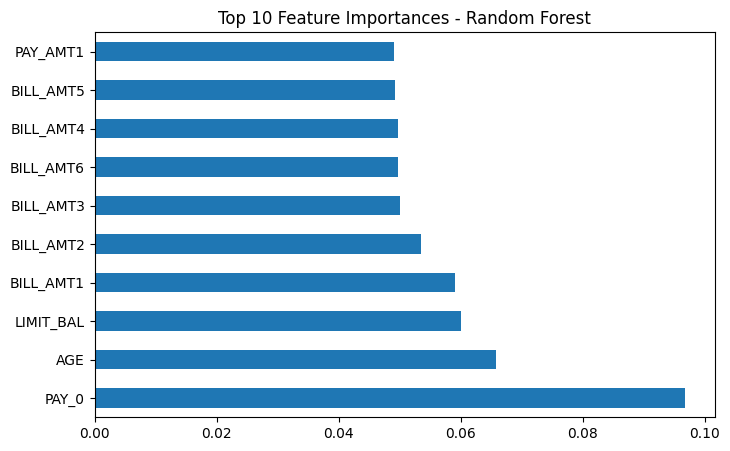

In [27]:
import matplotlib.pyplot as plt

importances = best_random_forest_model.feature_importances_
feature_names = X_encoded.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize = (8,5))
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

The plot shows the top 10 most important features for predicting credit card default using the tuned Random Forest model.
 
 Interpretation:
 
 - `PAY_0` (recent payment status) is the most influential predictor, indicating that recent repayment behavior is critical for default prediction.

 - `AGE` and `LIMIT_BAL` (credit limit) also have high importance, suggesting that younger clients and those with lower credit limits may be more likely to default.

 - Various `BILL_AMT` and `PAY_AMT` features (bill and payment amounts for different months) are important, showing that both outstanding bills and payment history contribute significantly to risk assessment.

 - Categorical features (e.g., `SEX`, `EDUCATION`, `MARRIAGE`) have lower importance compared to financial and behavioral variables.
 
In summary, the model relies most on recent payment status, age, credit limit, and monthly bill/payment amounts to predict default risk.